In [4]:
!pip install wordcloud

In [6]:
!pip install lime

  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=3a99c7700e3733ec3c9ba8927ec8d4189eccda1a1ab3dd615bccfca2a2c21c1c
  Stored in directory: /Users/alikhanuser/Library/Caches/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [8]:
import warnings


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

from collections import Counter

from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.metrics import accuracy_score, classification_report

from sklearn import svm

from sklearn.naive_bayes import MultinomialNB

from lime.lime_text import LimeTextExplainer

import nltk
from collections import Counter

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alikhanuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/alikhanuser/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alikhanuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alikhanuser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/alikhanuser/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
data=pd.read_csv('spam.csv',encoding_errors= 'replace')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
# i will drop these colomns they aren't useful
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [14]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
data.columns = ['Label', 'Message']

In [18]:
data.shape

(5572, 2)

In [20]:
data.isna().sum()

Label      0
Message    0
dtype: int64

In [22]:
data.duplicated().sum()

403

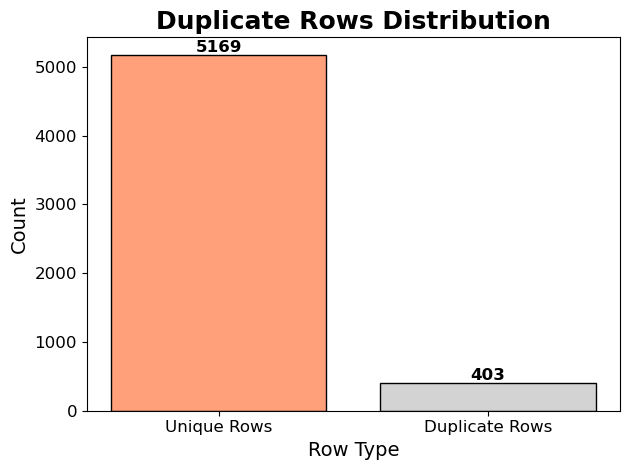

In [24]:
# This counts how many duplicate rows exist.
duplicate_count = data.duplicated().sum()

# Subtracting the number of rows in the entire dataset with the number of duplicates to get the dataset without duplicates.
unique_count = len(data) - duplicate_count
# Naming rows
row_types = ['Unique Rows', 'Duplicate Rows']

counts = [unique_count, duplicate_count]

plt.bar(
    row_types,  # Labels
    counts,  # Heights of the bars
    color=["#FFA07A", "#D3D3D3"],  # Colors for the bars
    edgecolor='black'
)

# Add labels and title
plt.title('Duplicate Rows Distribution', fontsize=18, color='#000000', fontweight='bold')
plt.ylabel('Count', fontsize=14)
plt.xlabel('Row Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add counts on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 50, str(count), ha='center', fontsize=12, fontweight='bold', color='black')

# Show plot
plt.tight_layout()
plt.show()

In [26]:
# Getting rid of duplicates
data=data.drop_duplicates()

In [28]:
# Checking if there are any duplicates left.
data.duplicated().sum()

0

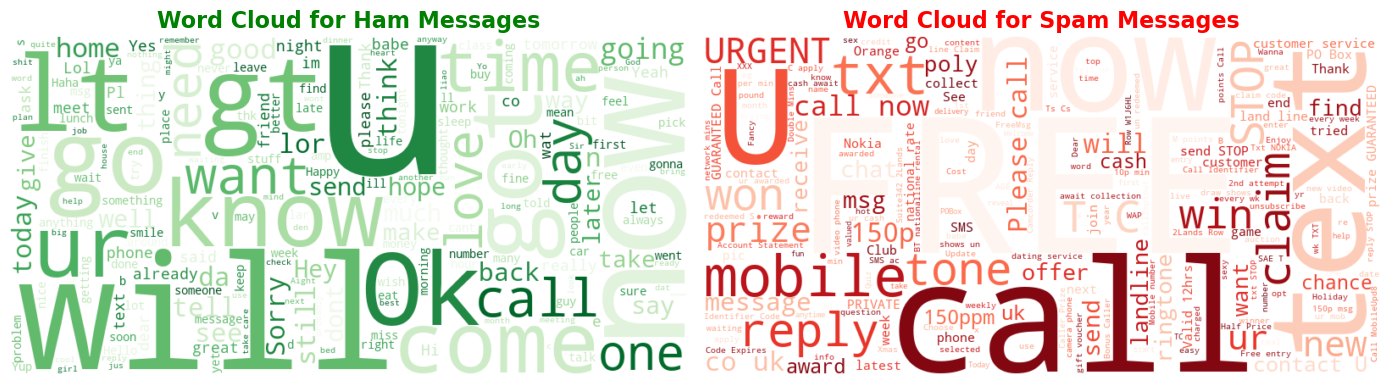

In [30]:

# Word Cloud for Ham
ham_words = ' '.join(data[data['Label'] == 'ham']['Message'])
ham_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(ham_words)

# Word Cloud for Spam
spam_words = ' '.join(data[data['Label'] == 'spam']['Message'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(spam_words)

# Plotting with Matplotlib
plt.figure(figsize=(14, 7))

# Ham Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages', fontsize=16, color='green', fontweight='bold')
plt.axis('off')

# Spam Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages', fontsize=16, color='red', fontweight='bold')
plt.axis('off')

plt.tight_layout()
plt.show()

In [31]:
# Adding Word Count Feature using lambda function
data['Word_Count'] = data['Message'].apply(lambda x: len(str(x).split()))

# Adding Character Count Feature using lambda
data['Char_Count'] = data['Message'].apply(lambda x: len(str(x)))

# Adding Average Word Length Feature with lambda
# Handling division by zero to avoid errors for messages with zero words
data['Avg_Word_Length'] = data.apply(
    lambda row: row['Char_Count'] / row['Word_Count'] if row['Word_Count'] > 0 else 0, axis=1
)


In [32]:
data.head()

,Label,Message,Word_Count,Char_Count,Avg_Word_Length
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,5.550000
1,ham,Ok lar... Joking wif u oni...,6,29,4.833333
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714
3,ham,U dun say so early hor... U c already then say...,11,49,4.454545
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308


In [33]:
scaler = MinMaxScaler()
data[['Word_Count', 'Char_Count', 'Avg_Word_Length']] = scaler.fit_transform(data[['Word_Count', 'Char_Count', 'Avg_Word_Length']])

In [34]:
data.head()

,Label,Message,Word_Count,Char_Count,Avg_Word_Length
0,ham,"Go until jurong point, crazy.. Available only ...",0.111765,0.120044,0.075532
1,ham,Ok lar... Joking wif u oni...,0.029412,0.029736,0.060284
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.158824,0.168502,0.075228
3,ham,U dun say so early hor... U c already then say...,0.058824,0.051762,0.052224
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.070588,0.064978,0.057283


In [40]:
# Custom abbreviation mapping
abbreviations = {
    "u": "you",
    "ur": "your",
    "wat": "what",
    "n": "and",
    "e": "the",
    "lol": "laughing out loud",
    "brb": "be right back",
    "gtg": "got to go",
    "idk": "I don't know",
    "omg": "oh my god",
    "ttyl": "talk to you later",
    "bbl": "be back later",
    "lmk": "let me know",
    "smh": "shaking my head",
    "tbh": "to be honest",
    "rofl": "rolling on the floor laughing",
    "afk": "away from keyboard",
    "np": "no problem",
    "ty": "thank you",
    "yw": "you're welcome",
    "hbu": "how about you",
    "dnd": "do not disturb",
    "fyi": "for your information",
    "br": "best regards",
    "imo": "in my opinion",
    "btw": "by the way",
    "stfu": "shut the f*** up",
    "bff": "best friend forever",
    "xoxo": "hugs and kisses",
    "dw": "don't worry",
    "plz": "please",
    "hmu": "hit me up",
    "cya": "see you",
    "srsly": "seriously",
    "4u": "for you",
    "gr8": "great",
    "b4": "before",
    "2moro": "tomorrow",
    "xD": "laughing expression",
    "wyd": "what are you doing",
    "wtb": "want to buy",
    "wts": "want to sell",
    "wtt": "want to trade",
    "ppl": "people",
    "omw": "on my way",
    "mfw": "my face when",
    "h8": "hate",
    "asap": "as soon as possible",
    "nm": "never mind",
    "noob": "newbie",
    "gratz": "congratulations",
    "faq": "frequently asked questions",
    "np": "no problem",
    "kthxbye": "okay, thanks, bye",
}

In [42]:
# Initialize Stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))


# Function to handle text normalization with stemming, stopwords, and abbreviation handling
def normalize_text(text):
    """
    Simplified text normalization: lowercasing, punctuation removal, stopword removal, 
    abbreviation handling, and stemming.
    """
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text into words
    words = word_tokenize(text)

    # Expand abbreviations
    words = [abbreviations.get(word, word) for word in words]

    # Remove punctuation, stopwords, and non-alphabetic words
    words = [re.sub(r"[^\w\s]", "", word) for word in words if word.isalpha() and word not in stop_words]

    # Stem words
    words = [stemmer.stem(word) for word in words]

    # Join words back into a single string
    normalized_text = " ".join(words)
    return normalized_text

In [44]:
# Apply the normalize_text function to the 'Message' column
data['Normalized_Message'] = data['Message'].apply(normalize_text)

In [45]:
data.head()

,Label,Message,Word_Count,Char_Count,Avg_Word_Length,Normalized_Message
0,ham,"Go until jurong point, crazy.. Available only ...",0.111765,0.120044,0.075532,go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,0.029412,0.029736,0.060284,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.158824,0.168502,0.075228,free entri wkli comp win fa cup final tkt may ...
3,ham,U dun say so early hor... U c already then say...,0.058824,0.051762,0.052224,dun say earli hor c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.070588,0.064978,0.057283,nah think goe usf live around though


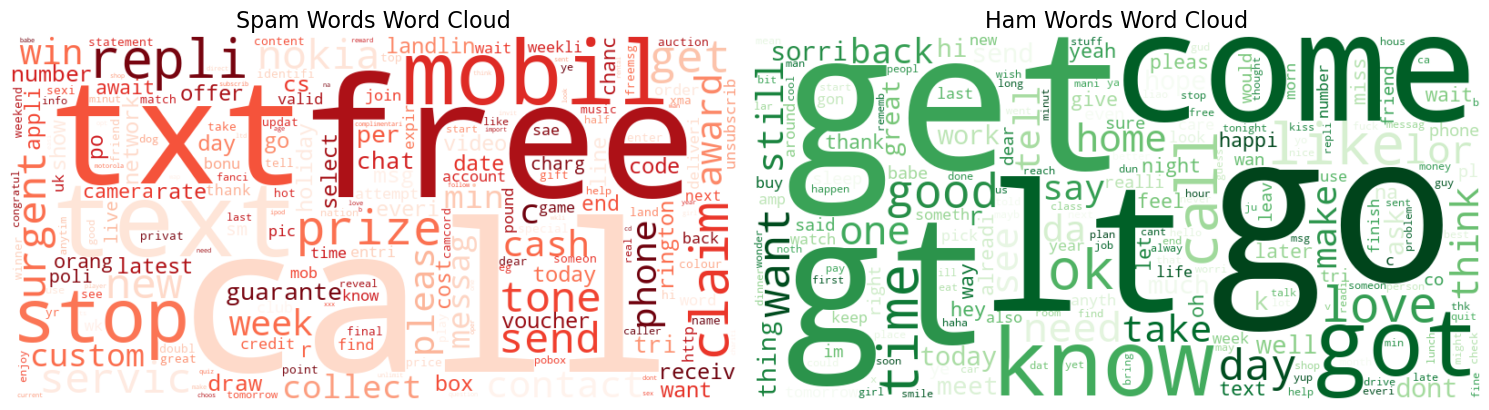

In [48]:
spam_words = Counter(" ".join(data[data['Label'] == 'spam']['Normalized_Message']).split())
ham_words = Counter(" ".join(data[data['Label'] == 'ham']['Normalized_Message']).split())

# Generate the word cloud for spam words
spam_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(spam_words)

# Generate the word cloud for ham words
ham_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate_from_frequencies(ham_words)

# Plotting the word clouds side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Display the spam word cloud
axes[0].imshow(spam_wc, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title("Spam Words Word Cloud", fontsize=16)

# Display the ham word cloud
axes[1].imshow(ham_wc, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title("Ham Words Word Cloud", fontsize=16)

plt.tight_layout()
plt.show()

In [50]:
data['Label'] = data['Label'].map({'ham': 0, 'spam': 1})

In [52]:
# Split features and labels
X = data['Message']
y = data['Label']

# Convert text data into numerical form using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_transformed = vectorizer.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_transformed, y)

# Now we have an equal amout of spam and ham, to avoid model bias
print("Before SMOTE:", y.value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts())

Before SMOTE: Label
0    4516
1     653
Name: count, dtype: int64
After SMOTE: Label
0    4516
1    4516
Name: count, dtype: int64


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Training set class distribution:")
print(pd.Series(y_train).value_counts())

Training set class distribution:
Label
0    3632
1    3593
Name: count, dtype: int64


In [56]:
logr = linear_model.LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

In [58]:
predict = logr.predict(X_test)

In [60]:
print('Accuracy: ', accuracy_score(y_test, predict))

Accuracy:  0.9856115107913669


In [62]:
# We tried using our dataset for Linearregression aswell, but it didnt work, because LinearRegression cant handle binary data only.

In [64]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SVC()

In [65]:
predict_svc = svm_model.predict(X_test)

In [67]:
print('Accuracy: ', accuracy_score(y_test, predict_svc))

Accuracy:  0.9972329828444937


In [70]:
mnnb = MultinomialNB()
mnnb.fit(X_train, y_train)

MultinomialNB()

In [72]:
predict_mnnb = mnnb.predict(X_test)

In [74]:
print('Accuracy: ', accuracy_score(y_test, predict_mnnb))

Accuracy:  0.9889319313779745


In [76]:
def predict_message(message, model, vectorizer):
    # Define label mapping
    label_mapping = {
        0: "Not Spam", 
        1: "Spam"       
    }
    
    # Preprocess the message
    message_transformed = vectorizer.transform([message])
    
    # Predict the class and probabilities
    predicted_class = model.predict(message_transformed)[0]
    predicted_probabilities = model.predict_proba(message_transformed)[0]
    
    # Map the predicted class to its label
    predicted_label = label_mapping[predicted_class]
    
    return predicted_label, predicted_probabilities

In [78]:
new_message = "Hi Alex, I hope you're doing well. Just a reminder about our meeting tomorrow at 10 AM. Let me know if the time still works for you. Looking forward to catching up!"
predicted_class, predicted_probabilities = predict_message(new_message, mnnb, vectorizer)
print(f"Predicted Class: {predicted_class}")
print(f"Prediction Probabilities: {predicted_probabilities}")

Predicted Class: Not Spam
Prediction Probabilities: [0.98789197 0.01210803]


In [84]:
#Used by lime as a wrapper function to create explanations and probablilites(ham, spam) for different outputs of our model

def predict_proba(messages):
    """
    Wrapper function to get class probabilities for a list of messages.
    Args:
        messages (list of str): List of input text messages.
    Returns:
        np.ndarray: Array of probabilities for each class (rows = messages, cols = classes).
    """
    # For each message, use predict_message and extract probabilities
    probabilities = [predict_message(message, mnnb, vectorizer)[1] for message in messages]
    return np.array(probabilities)

In [86]:
from lime.lime_text import LimeTextExplainer

#Initialize Explainer with class names
explainer = LimeTextExplainer(class_names=['Not Spam', 'Spam'])

#Identify the predicting function of the model
#predicted_class, predicted_probabilities = predict_message(new_message, model, vectorizer)

#Explain a Prediction
# explain_instance needs the tet input, the function which will return a probability of it being spam or ham and the number of features
#the number of features is just the macimum number of words it will show me from highest impact on decision starting
new_message="I've got Aids Mark, Please I need you to go to the doctor with me, Congratulations on giving me Aids Mark, really great job, I am so lucky..."
explanation = explainer.explain_instance(new_message, predict_proba, num_features=10)

In [88]:
explanation.show_in_notebook()